In [51]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

##Настройка##

In [2]:
pd.set_option("display.max_columns", None)

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Загрузка данных##

In [14]:
url = '/content/drive/MyDrive/frauds.csv' # Ссылка на датасет на гугл диске

df = pd.read_csv(url, sep = ',')

##Анализ данных##

In [17]:
df.shape

(1504, 11)

In [19]:
df.head(10)

,Unnamed: 0,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,376,1,1679,62.67,0,2,4,0.016677,0.037326,0.000000,1
1,377,5,337,9.35,3,7,3,0.047478,0.027745,0.187500,0
2,378,4,661,88.58,4,4,1,0.030257,0.134009,0.200000,0
3,379,1,521,89.61,1,0,1,0.055662,0.171996,0.034483,0
4,380,3,1072,89.13,0,3,1,0.004664,0.083144,0.000000,0
5,381,5,1621,53.69,0,7,1,0.016039,0.033122,0.000000,0
6,382,4,40,25.99,6,5,5,0.350000,0.649750,0.428571,0
7,383,5,1106,13.65,4,3,3,0.003617,0.012342,1.000000,0
8,384,1,153,39.39,4,3,4,0.084967,0.257451,0.307692,0
9,385,1,950,25.83,0,1,4,0.031579,0.027189,0.000000,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1504 non-null   int64  
 1   trustLevel                 1504 non-null   int64  
 2   totalScanTimeInSeconds     1504 non-null   int64  
 3   grandTotal                 1504 non-null   float64
 4   lineItemVoids              1504 non-null   int64  
 5   scansWithoutRegistration   1504 non-null   int64  
 6   quantityModifications      1504 non-null   int64  
 7   scannedLineItemsPerSecond  1504 non-null   float64
 8   valuePerSecond             1504 non-null   float64
 9   lineItemVoidsPerPosition   1504 non-null   float64
 10  fraud                      1504 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 129.4 KB


In [22]:
df.describe()

,Unnamed: 0,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000,1504.000000
mean,1127.500000,3.406915,930.702128,51.171443,5.485372,4.908910,2.510638,0.058570,0.195688,0.766452,0.055186
std,434.311716,1.711565,531.209639,28.827037,3.470020,3.134225,1.704331,0.286675,0.981856,1.356485,0.228419
min,376.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000548,0.000044,0.000000,0.000000
25%,751.750000,2.000000,471.000000,26.515000,2.000000,2.000000,1.000000,0.008191,0.028281,0.160000,0.000000
50%,1127.500000,3.000000,933.500000,51.745000,5.000000,5.000000,3.000000,0.016166,0.054920,0.361818,0.000000
75%,1503.250000,5.000000,1390.750000,76.737500,9.000000,8.000000,4.000000,0.032787,0.107984,0.703571,0.000000
max,1879.000000,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,21.646667,11.000000,1.000000


In [23]:
df['fraud'].unique()

array([1, 0])

In [24]:
# Проверим количество строк, которое принадлежит каждому классу:

df['fraud'].value_counts()

,count
fraud,
0,1421
1,83


##Визуализация данных##

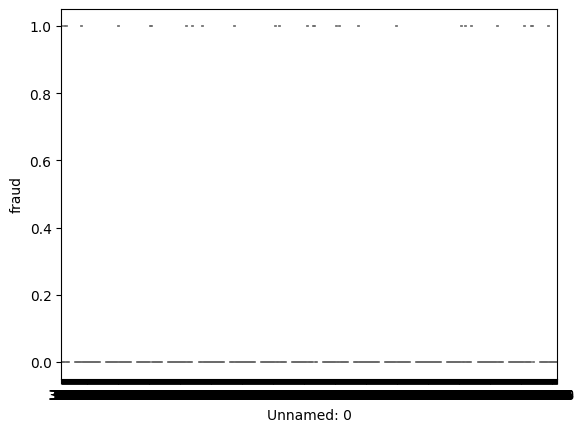

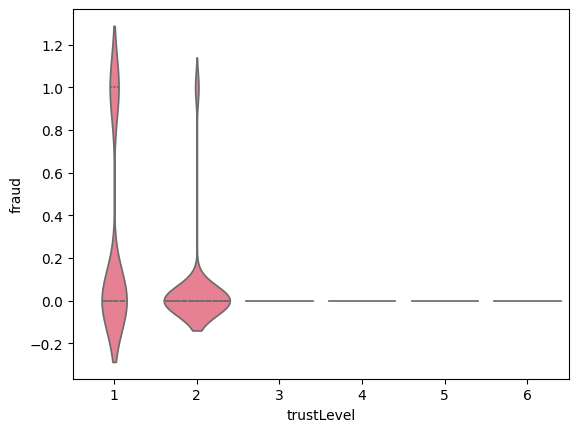

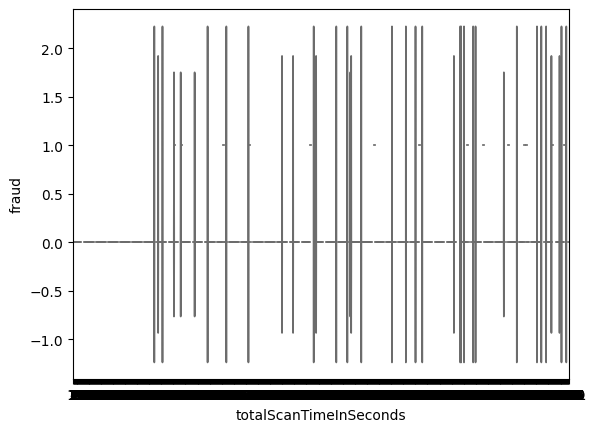

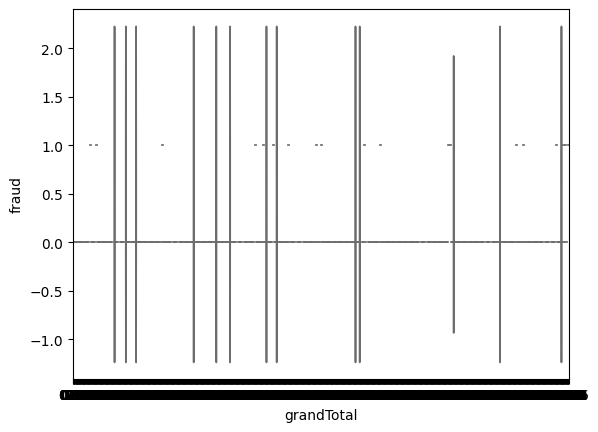

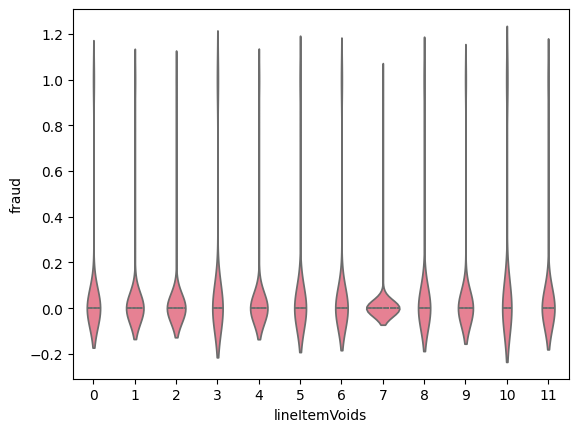

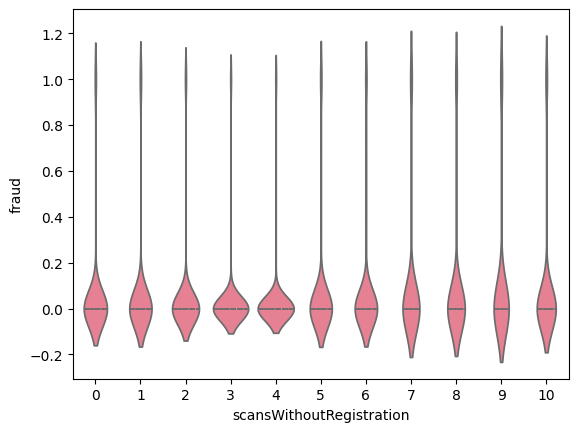

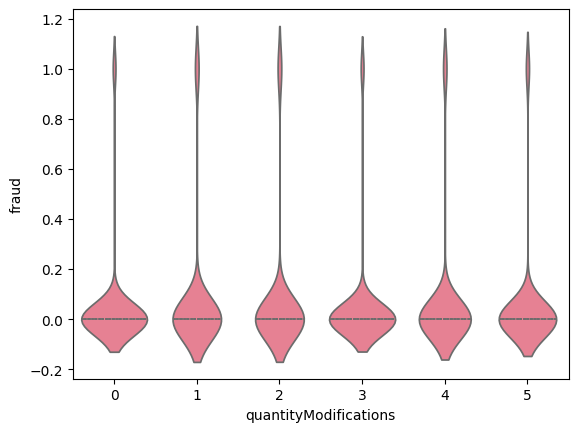

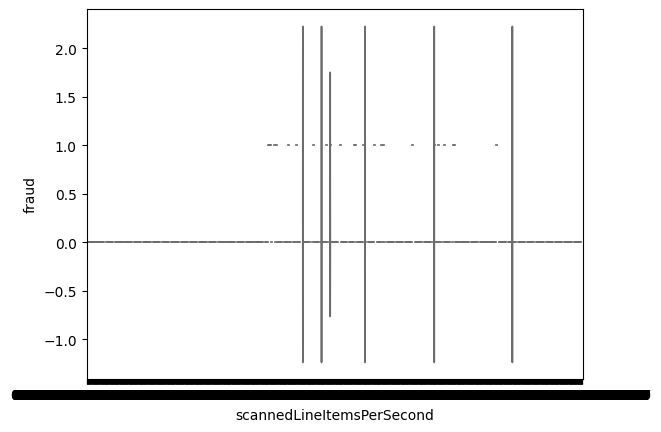

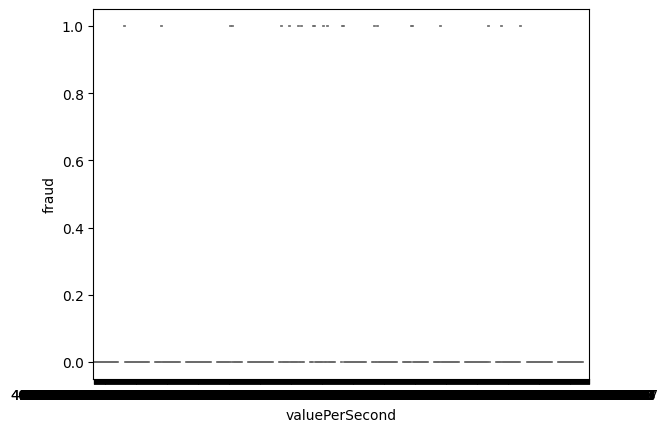

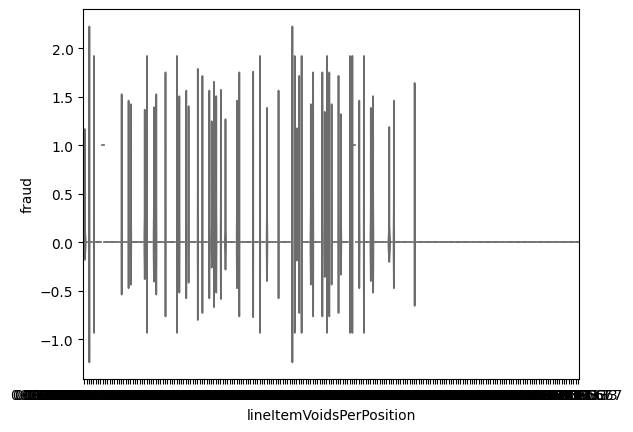

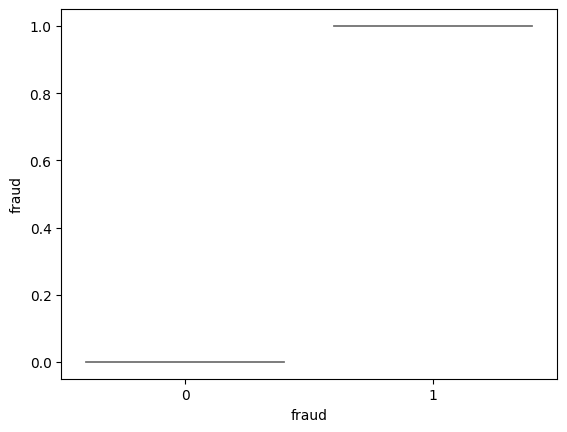

In [55]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:

for col in df.columns:
  sns.violinplot(y='fraud', x=col, data=df, inner='quartile')
  plt.show()

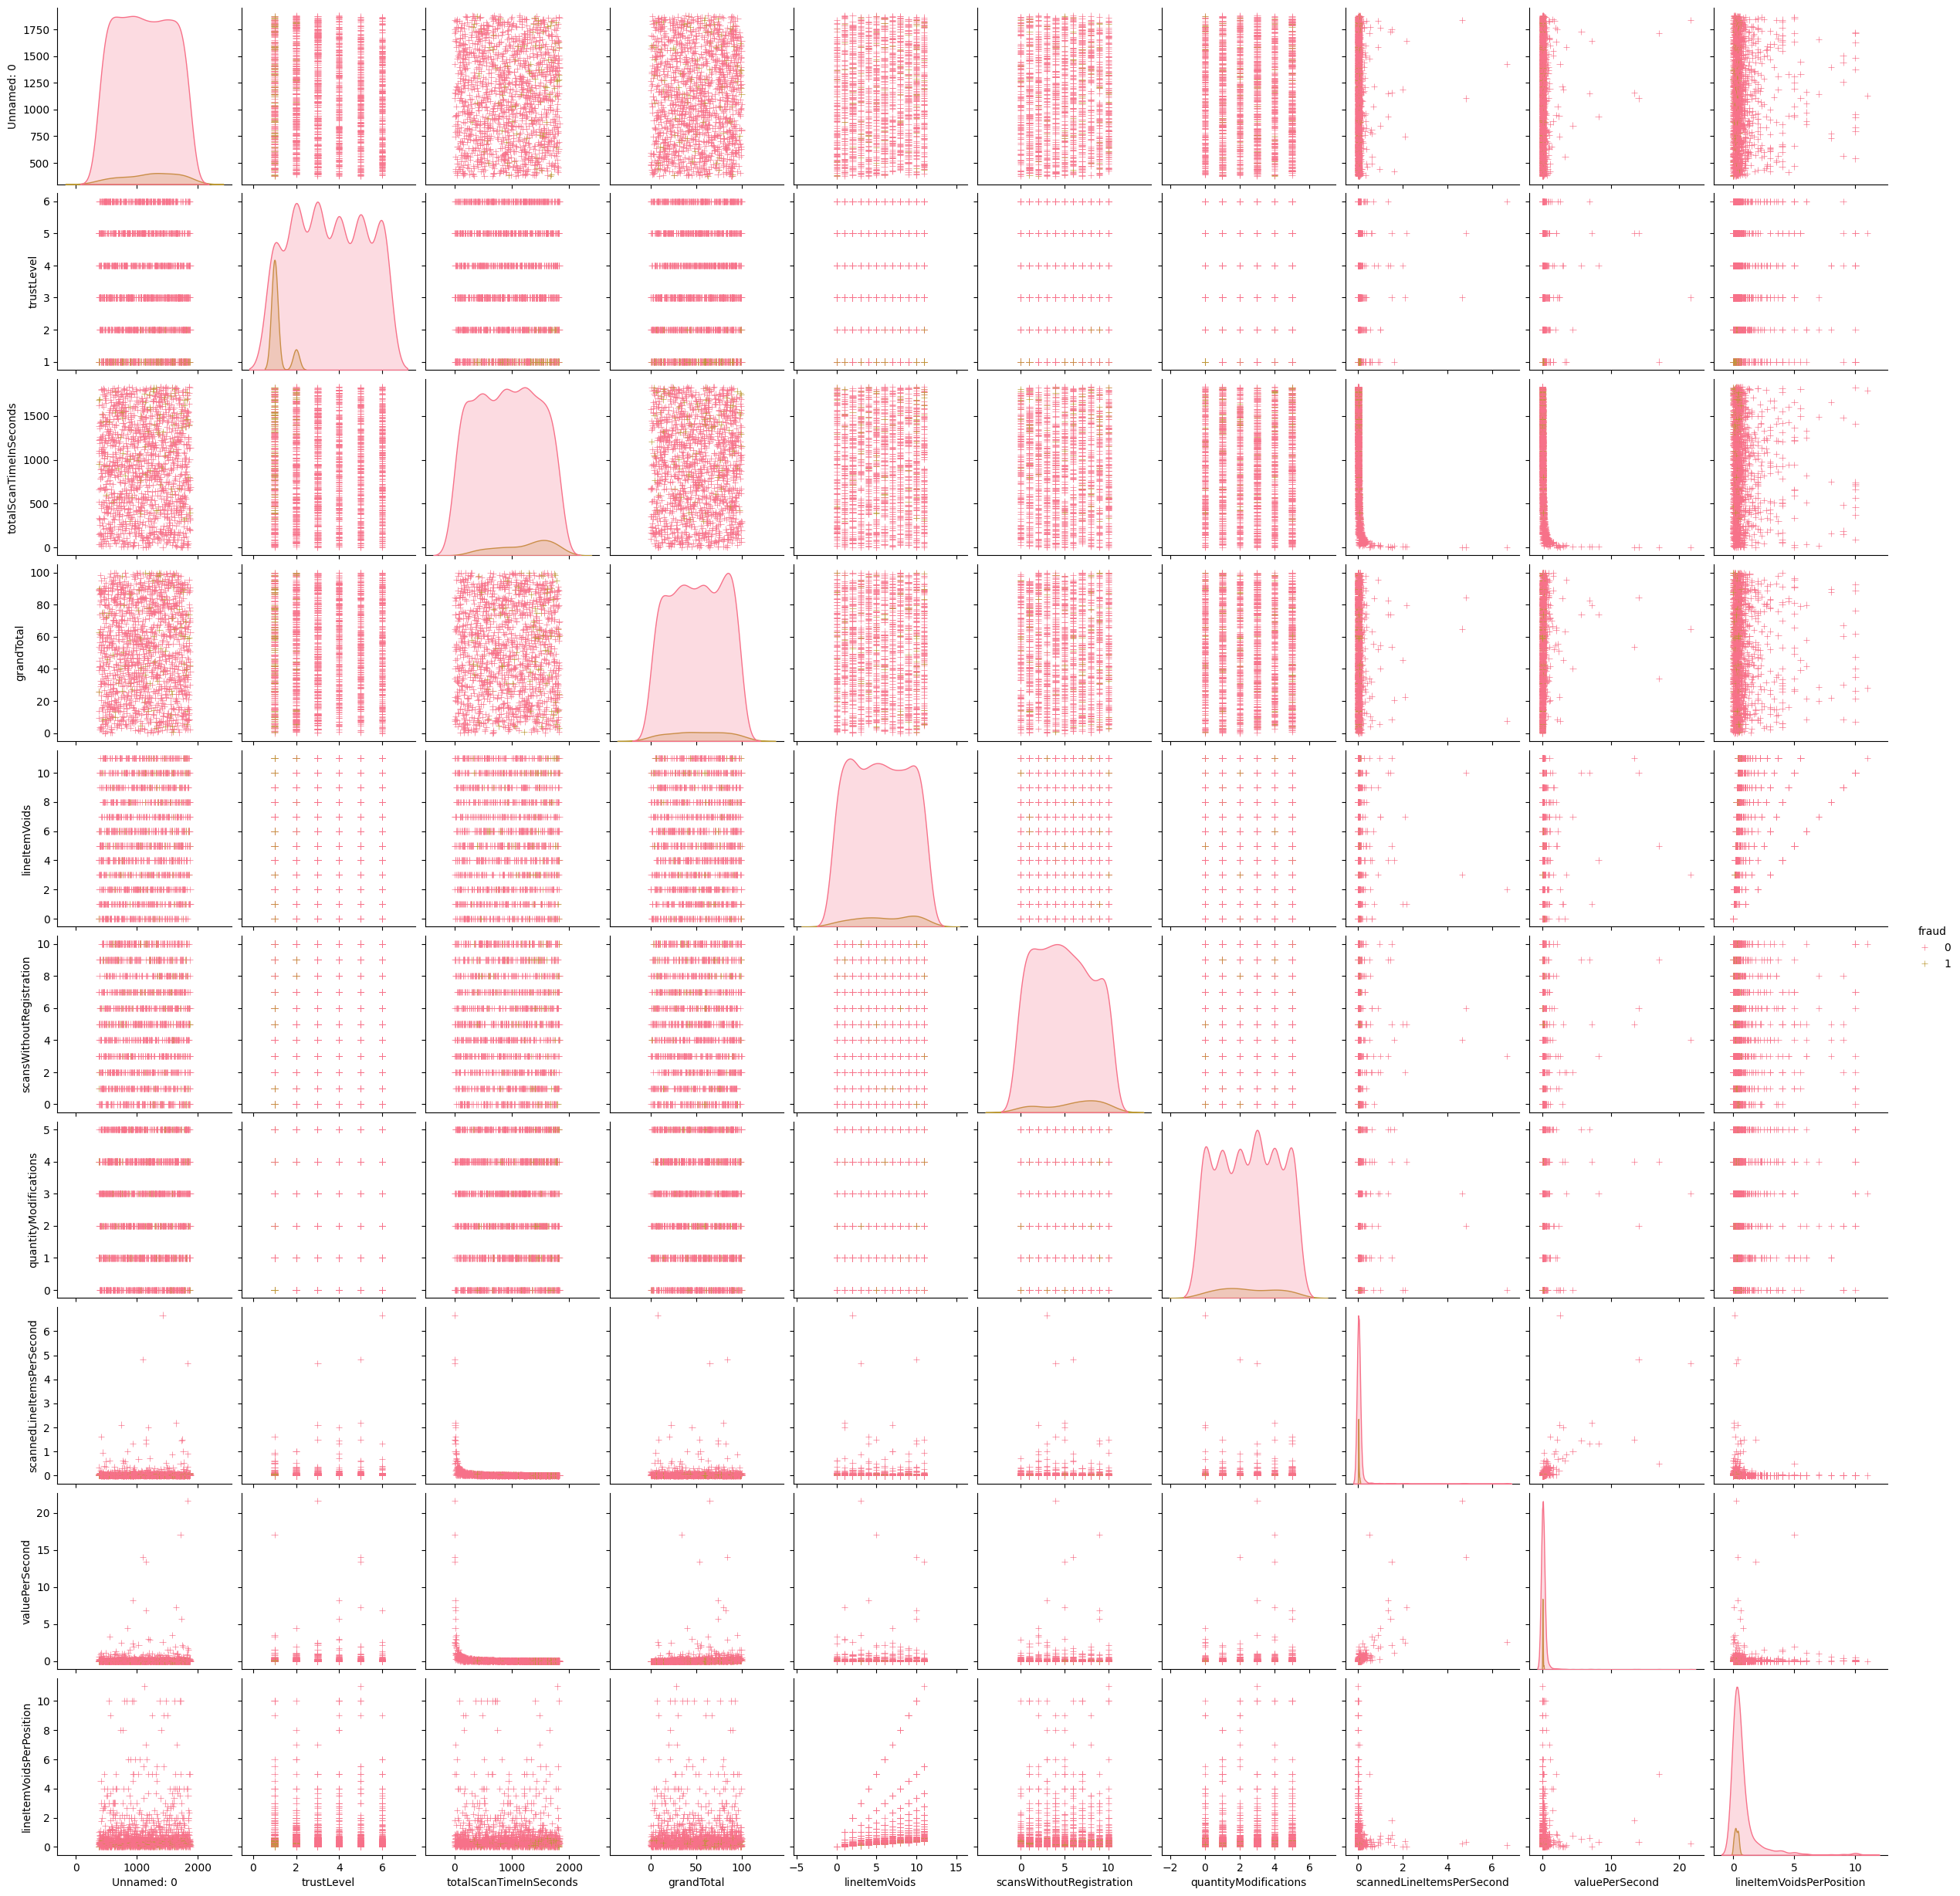

In [26]:
sns.pairplot(df, hue='fraud', markers='+')
plt.show()

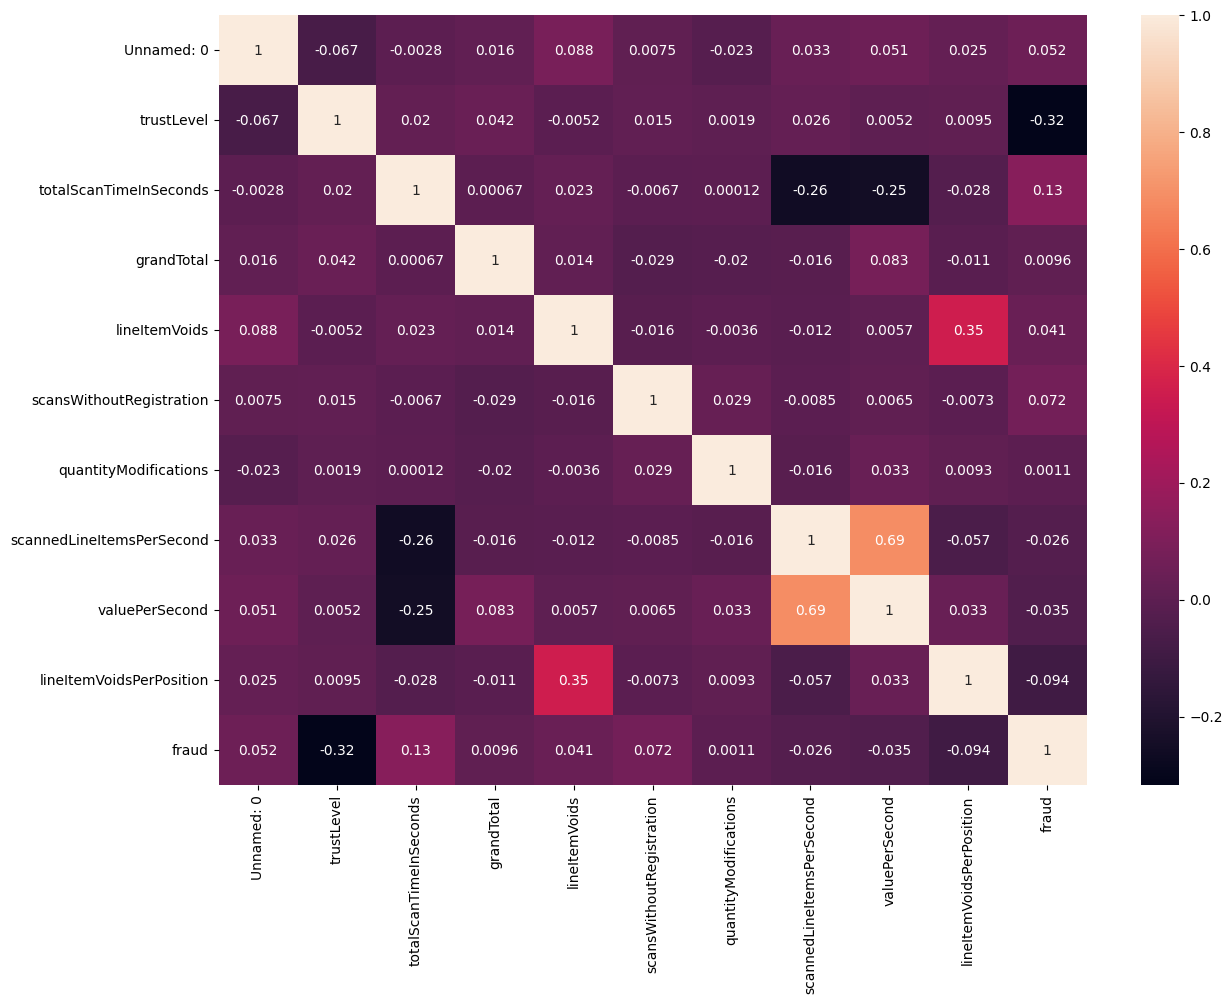

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

По тепловой карте можно сделать вывод что параметров оказывающих особенно сильное влияние на результат в датасете нет.

##Построение модели##

###Разделение датасета###

In [29]:
X = df.drop(['fraud'], axis=1)
y = df['fraud']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1504, 10) | y shape: (1504,) 


###Разделение на обучающую выборку и тестовую###

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.10970853756091087, pvalue=0.9126551846562267, df=1502.0)

###Обучение и выбор подходящей модели###
Далее попробуем следующие алгоритмы:

Logistic Regression (LR)  
Linear Discriminant Analysis (LDA)  
K-Nearest Neighbors (KNN)  
Classification and Regression Trees (CART)  
Gaussian Naive Bayes (NB)  
Support Vector Machines (SVM)  

In [37]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s \n  mean = %f \n  std = %f \n' % (name, cv_results.mean(), cv_results.std()))

LR 
  mean = 0.960916 
  std = 0.010620 

LDA 
  mean = 0.945138 
  std = 0.004060 

KNN 
  mean = 0.944304 
  std = 0.006512 

CART 
  mean = 0.960978 
  std = 0.015637 

NB 
  mean = 0.841288 
  std = 0.045613 

SVC 
  mean = 0.945145 
  std = 0.003969 



Лучшие: модклями оказались: Logistic Regression и Classification and Regression Trees.  
Далее будем работать с моделью Classification and Regression Trees.

In [40]:
sk_cart = DecisionTreeClassifier()
sk_cart.fit(X_train, y_train)
sk_cart_pred_res = sk_cart.predict(X_test)
sk_cart_accuracy = accuracy_score(y_test, sk_cart_pred_res)

print(f'CART LDA accuracy: {sk_cart_accuracy}')
print(f'CART LDA prediction: {sk_cart_pred_res}')

CART LDA accuracy: 0.9568106312292359
CART LDA prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0]


###Визуализация решения###

<Axes: title={'center': 'CART surface with original features'}>

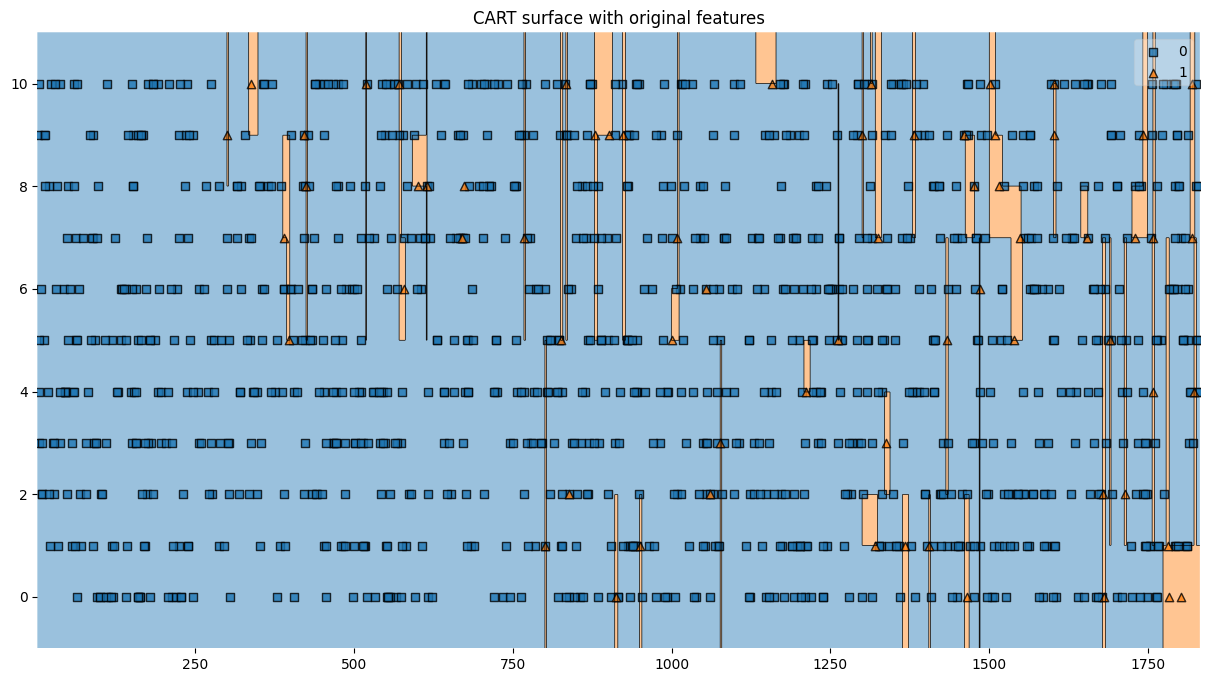

In [56]:
y_s = y_train
X_2d= X_train[['totalScanTimeInSeconds', 'scansWithoutRegistration']].values

y_2d = y_s.values


sk_cart = DecisionTreeClassifier()
sk_cart.fit(X_2d, y_2d)

plt.figure(figsize=(15, 8))
plt.title('CART surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_cart)

На мой взгляд график выглядит достаточно некрасиво, думаю это связано с крайне малым числом записей с результирующей единицей в датасете.

In [54]:
predict = sk_lda.predict(X_test[['totalScanTimeInSeconds', 'scansWithoutRegistration']])

accuracy = metrics.accuracy_score(y_test, predict)

recall = metrics.recall_score(y_test, predict, average="weighted")
precision = metrics.precision_score(y_test, predict, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y_test, predict, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.9
Precision (confidence when predicting a 1): 0.89
Detail:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       284
           1       0.07      0.06      0.06        17

    accuracy                           0.90       301
   macro avg       0.51      0.50      0.50       301
weighted avg       0.89      0.90      0.90       301



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
